In [1]:
import re
import numpy as np
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

import joblib

## Own specific functions 
from functions import *

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">REDUCIENDO CLIENTES A PREDICER CON BASE EN LAS PREDICCIONES</h2>
</div>

In [46]:
df_clients_reduced_to_predict = pd.read_csv(r"datasets\backend\df_clients_reduced_to_predict.csv")

In [65]:
df_clients_to_predict_feature_selected = pd.read_csv(r"datasets\finals_datasets\df_clients_to_predict.csv")

In [48]:
df_clients_reduced_to_predict = df_clients_reduced_to_predict.rename(columns=lambda x:re.sub("[^A-Za-z0-9_]+", "", x))

In [49]:
df_clients_to_predict_feature_selected = df_clients_to_predict_feature_selected.rename(columns=lambda x:re.sub("[^A-Za-z0-9_]+", "", x))

In [50]:
df_analysis(df_clients_reduced_to_predict, "df_clients_reduced_to_predict", analysis_type="header")


Analysis Header of df_clients_reduced_to_predict dataset
--------------------------------------------------------------------------------
- Dataset shape:			 14742 rows and 796 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 89.5 MB


In [66]:
df_analysis(df_clients_to_predict_feature_selected, "df_clients_to_predict_feature_selected", analysis_type="header")


Analysis Header of df_clients_to_predict_feature_selected dataset
--------------------------------------------------------------------------------
- Dataset shape:			 48744 rows and 508 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 188.9 MB


In [52]:
df_clients_reduced_to_predict.head(3)

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,231480,1,0,1,1,180000.0,225000.0,23184.0,225000.0,0.01452,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
1,161845,1,0,0,0,247500.0,1928304.0,79708.5,1800000.0,0.00963,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
2,423712,0,1,0,0,360000.0,232344.0,12735.0,157500.0,0.00733,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683


In [53]:
df_clients_to_predict_feature_selected.head(3)

,index,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,0,100001,1,0,0,0,135000.0,568800.0,20560.5,450000.0,...,5885.1323,41195.926,3951.000,17397.900,5885.1323,41195.926,-1628.0,-2195.00000,-15365.0,7.0
1,1,100005,0,0,0,0,99000.0,222768.0,17370.0,180000.0,...,6240.2050,56161.844,4813.200,17656.244,6240.2050,56161.844,-470.0,-609.55554,-5486.0,9.0
2,2,100013,0,1,0,0,202500.0,663264.0,69777.0,630000.0,...,10897.8980,1689174.200,6.165,357347.750,9740.2350,1509736.500,-14.0,-1358.10960,-210507.0,155.0


In [60]:
NOT_TRAINING_COLUMNS  = ["TARGET", "SK_ID_BUREAU", "SK_ID_PREV", "index"] 
TRAINING_COLUMNS = [col for col in df_clients_to_predict_feature_selected.columns if col not in NOT_TRAINING_COLUMNS]

In [68]:
df_clients_to_predict_feature_selected = df_clients_to_predict_feature_selected[TRAINING_COLUMNS]

In [69]:
df_clients_to_predict_feature_selected.head(3)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,...,5885.1323,41195.926,3951.000,17397.900,5885.1323,41195.926,-1628.0,-2195.00000,-15365.0,7.0
1,0,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,...,6240.2050,56161.844,4813.200,17656.244,6240.2050,56161.844,-470.0,-609.55554,-5486.0,9.0
2,0,1,0,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,...,10897.8980,1689174.200,6.165,357347.750,9740.2350,1509736.500,-14.0,-1358.10960,-210507.0,155.0


In [17]:
fs = SelectKBest(score_func=f_classif, k=150)

In [18]:
df_current_clients = pd.read_csv(r"datasets\finals_datasets\df_current_clients.csv")

In [19]:
df_current_clients = df_current_clients.rename(columns=lambda x:re.sub("[^A-Za-z0-9_]+", "", x))

In [20]:
df_analysis(df_current_clients, "df_current_clients", analysis_type="header")


Analysis Header of df_current_clients dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 509 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 1.2 GB


In [23]:
df_current_clients = memory_optimization(df_current_clients)

In [24]:
df_analysis(df_current_clients, "df_current_clients", analysis_type="header")


Analysis Header of df_current_clients dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 509 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 459.8 MB


In [67]:
NOT_TRAINING_COLUMNS  = ["TARGET", "SK_ID_CURR", "SK_ID_BUREAU", "SK_ID_PREV", "index"] 
TRAINING_COLUMNS = [col for col in df_current_clients.columns if col not in NOT_TRAINING_COLUMNS]

In [26]:
X = df_current_clients[TRAINING_COLUMNS]

In [27]:
y_target = df_current_clients.loc[:,"TARGET"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.20, stratify=y_target, random_state=42)

In [29]:
fs.fit(X_train, y_train)

C:\Users\Samir\miniconda3\envs\p7\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [223 228 244 278 286 289 315 320 325 335 348 377 383 387 396 408 414 478] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Samir\miniconda3\envs\p7\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=150)

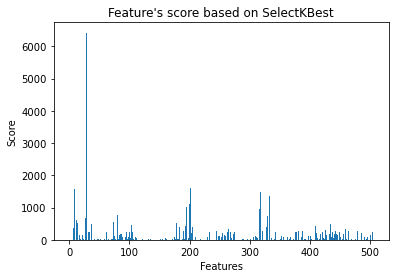

In [30]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_,)
plt.title("Feature's score based on SelectKBest")
plt.ylabel("Score")
plt.xlabel("Features")
plt.show()

In [31]:
fs = SelectKBest(score_func=f_classif, k=150)

In [32]:
fs.fit(X_train, y_train)

C:\Users\Samir\miniconda3\envs\p7\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [223 228 244 278 286 289 315 320 325 335 348 377 383 387 396 408 414 478] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Samir\miniconda3\envs\p7\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=150)

In [33]:
df_clients_to_predict_feature_selected.shape

(48744, 507)

In [34]:
df_clients_to_predict_feature_selected.head(3)

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,100001,1,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,5885.1323,41195.926,3951.000,17397.900,5885.1323,41195.926,-1628.0,-2195.00000,-15365.0,7.0
1,100005,0,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,6240.2050,56161.844,4813.200,17656.244,6240.2050,56161.844,-470.0,-609.55554,-5486.0,9.0
2,100013,0,1,0,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,10897.8980,1689174.200,6.165,357347.750,9740.2350,1509736.500,-14.0,-1358.10960,-210507.0,155.0


In [35]:
df_temp = pd.DataFrame()

In [36]:
df_temp["SK_ID_CURR"] = df_clients_to_predict_feature_selected["SK_ID_CURR"].copy()

In [37]:
df_clients_to_predict_feature_selected.drop(columns=["SK_ID_CURR"], axis=1, inplace=True)

In [38]:
df_clients_to_predict_feature_selected.head(3)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,1,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,...,5885.1323,41195.926,3951.000,17397.900,5885.1323,41195.926,-1628.0,-2195.00000,-15365.0,7.0
1,0,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,...,6240.2050,56161.844,4813.200,17656.244,6240.2050,56161.844,-470.0,-609.55554,-5486.0,9.0
2,0,1,0,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,...,10897.8980,1689174.200,6.165,357347.750,9740.2350,1509736.500,-14.0,-1358.10960,-210507.0,155.0


In [39]:
df_clients_to_predict_feature_selected.shape

(48744, 506)

In [40]:
df_clients_to_predict_feature_selected = fs.transform(df_clients_to_predict_feature_selected)

In [42]:
df_clients_to_predict_feature_selected.shape

(48744, 150)

In [45]:
cols = fs.get_support(indices=True)

In [54]:
df_clients_to_predict_feature_selected.shape

(48744, 508)

In [55]:
df_clients_to_predict_feature_selected.head(3)

,index,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,0,100001,1,0,0,0,135000.0,568800.0,20560.5,450000.0,...,5885.1323,41195.926,3951.000,17397.900,5885.1323,41195.926,-1628.0,-2195.00000,-15365.0,7.0
1,1,100005,0,0,0,0,99000.0,222768.0,17370.0,180000.0,...,6240.2050,56161.844,4813.200,17656.244,6240.2050,56161.844,-470.0,-609.55554,-5486.0,9.0
2,2,100013,0,1,0,0,202500.0,663264.0,69777.0,630000.0,...,10897.8980,1689174.200,6.165,357347.750,9740.2350,1509736.500,-14.0,-1358.10960,-210507.0,155.0


In [70]:
df_final_client_to_predict = df_clients_to_predict_feature_selected.iloc[:, cols]

In [71]:
df_final_client_to_predict.shape

(48744, 150)

In [72]:
df_final_client_to_predict.head()

,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,1,0,568800.0,450000.0,0.018850,-19241,-2329.0,-5170.0,-812,1,...,9.0,9.0,62.0,0.0000,0.00,3951.000,5885.1323,41195.926,-2195.00000,-15365.0
1,0,0,222768.0,180000.0,0.035792,-18064,-4469.0,-9118.0,-1623,1,...,11.0,11.0,213.0,0.0000,0.00,4813.200,6240.2050,56161.844,-609.55554,-5486.0
2,0,1,663264.0,630000.0,0.019101,-20038,-4458.0,-2175.0,-3503,1,...,36.0,36.0,887.0,1157.6627,179437.72,6.165,9740.2350,1509736.500,-1358.10960,-210507.0
3,1,0,1575000.0,1575000.0,0.026392,-13976,-1866.0,-2000.0,-4208,1,...,31.0,31.0,369.0,622.5507,70348.23,1.170,4356.7314,492310.660,-858.54865,-97016.0
4,0,1,625500.0,625500.0,0.010032,-13040,-2191.0,-4000.0,-4262,1,...,13.0,13.0,147.0,0.0000,0.00,11097.450,11100.3380,133204.050,-634.25000,-7611.0


In [76]:
df_final_client_to_predict.insert(0, 'SK_ID_CURR', df_temp)

In [77]:
df_final_client_to_predict.shape

(48744, 151)

In [78]:
df_final_client_to_predict.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,100001,1,0,568800.0,450000.0,0.018850,-19241,-2329.0,-5170.0,-812,...,9.0,9.0,62.0,0.0000,0.00,3951.000,5885.1323,41195.926,-2195.00000,-15365.0
1,100005,0,0,222768.0,180000.0,0.035792,-18064,-4469.0,-9118.0,-1623,...,11.0,11.0,213.0,0.0000,0.00,4813.200,6240.2050,56161.844,-609.55554,-5486.0
2,100013,0,1,663264.0,630000.0,0.019101,-20038,-4458.0,-2175.0,-3503,...,36.0,36.0,887.0,1157.6627,179437.72,6.165,9740.2350,1509736.500,-1358.10960,-210507.0
3,100028,1,0,1575000.0,1575000.0,0.026392,-13976,-1866.0,-2000.0,-4208,...,31.0,31.0,369.0,622.5507,70348.23,1.170,4356.7314,492310.660,-858.54865,-97016.0
4,100038,0,1,625500.0,625500.0,0.010032,-13040,-2191.0,-4000.0,-4262,...,13.0,13.0,147.0,0.0000,0.00,11097.450,11100.3380,133204.050,-634.25000,-7611.0


In [79]:
df_final_client_to_predict.to_csv("datasets/backend/df_clients_to_predict_feature_selected.csv", index=False)

In [2]:
df_clients = pd.read_csv(r"datasets\backend\df_clients_to_predict_feature_selected.csv")

In [3]:
df_analysis(df_clients, "df_clients", analysis_type="header")


Analysis Header of df_clients dataset
--------------------------------------------------------------------------------
- Dataset shape:			 14477 rows and 151 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 16.7 MB


In [4]:
df_clients.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,100005,0,0,222768.0,180000.0,0.035792,-18064,-4469.0,-9118.0,-1623,...,11.0,11.0,213.0,0.0000,0.0,4813.20,6240.205,56161.844,-609.55554,-5486.0
1,100038,0,1,625500.0,625500.0,0.010032,-13040,-2191.0,-4000.0,-4262,...,13.0,13.0,147.0,0.0000,0.0,11097.45,11100.338,133204.050,-634.25000,-7611.0
2,100057,0,1,499221.0,373500.0,0.022800,-16685,-2580.0,-10125.0,-241,...,13.0,13.0,220.0,0.0000,0.0,4747.59,9845.424,98454.240,-553.40000,-5534.0
3,100090,1,0,261621.0,216000.0,0.008019,-15524,-3555.0,-7833.0,-3985,...,58.0,58.0,361.0,-5806.4517,-360000.0,5837.40,20018.154,1241125.500,-532.79034,-33033.0
4,100091,1,0,296280.0,225000.0,0.018634,-12278,-929.0,-6031.0,-4586,...,6.0,6.0,61.0,0.0000,0.0,7078.95,8445.258,42226.290,-540.20000,-2701.0


In [5]:
X = df_clients.drop(columns="SK_ID_CURR", axis=1)

In [ ]:
X.iloc[:, ]

In [7]:
df_clients.iloc[[0]]

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,100005,0,0,222768.0,180000.0,0.035792,-18064,-4469.0,-9118.0,-1623,...,11.0,11.0,213.0,0.0,0.0,4813.2,6240.205,56161.844,-609.55554,-5486.0


In [8]:
X.iloc[[0]]

,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,0,0,222768.0,180000.0,0.035792,-18064,-4469.0,-9118.0,-1623,1,...,11.0,11.0,213.0,0.0,0.0,4813.2,6240.205,56161.844,-609.55554,-5486.0


In [9]:
test = X.iloc[[0]]

In [20]:
threshold = 0.135

In [21]:
# load the model from disk
initial_model = joblib.load("models/model_20220220.pkl")

In [22]:
y_prob = initial_model.predict_proba(test)
y_prob_temp = y_prob[:, 1]

In [23]:
yhat = (y_prob_temp >= threshold).astype(int)

In [24]:
Counter(yhat)

Counter({1: 1})

In [25]:
result = initial_model.predict(test)

In [26]:
result

array([0.], dtype=float32)

In [27]:
y_prob

array([[0.84033307, 0.15966693]])

In [31]:
threshold_new = 0.535

In [32]:
yhat_new = (y_prob_temp >= threshold_new).astype(int)

In [34]:
Counter(yhat_new)

Counter({0: 1})

In [89]:
type(yhat)

numpy.ndarray

In [90]:
df_y_pred = pd.DataFrame(data=yhat, columns=["TARGET"])

In [91]:
df_clients = pd.concat([df_clients, df_y_pred], axis=1)

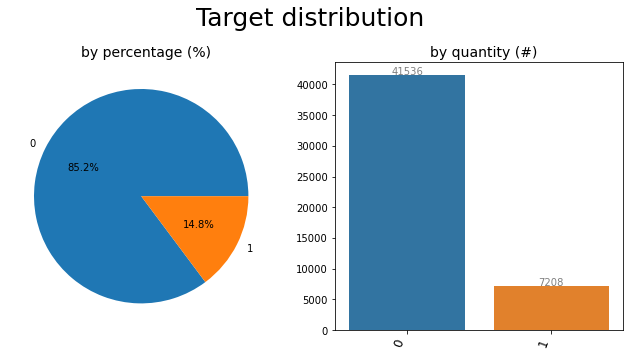

In [92]:
barplot_and_pie(df_clients["TARGET"], "Target distribution", " ")

In [95]:
df_1 = df_clients[df_clients["TARGET"]==1]

In [96]:
df_1.shape

(7208, 152)

In [97]:
df_0 = df_clients[df_clients["TARGET"]==0]

In [98]:
df_0.shape

(41536, 152)

In [99]:
df_0 = df_0.sample(frac=0.175)

In [100]:
df_0.shape

(7269, 152)

In [101]:
df_clients_to_predict_backend = pd.concat([df_0, df_1])

In [102]:
df_clients_to_predict_backend.tail()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,TARGET
48716,456007,0,0,318645.0,216000.0,0.008230,-12607,-2283.0,-6533.0,-4242,...,28.0,288.0,0.0000,0.000,15338.16,18877.060,490803.56,-482.69232,-12550.0,1
48724,456111,1,0,514710.0,387000.0,0.020246,-15847,-2191.0,-5194.0,-4141,...,67.0,553.0,1745.7239,141403.640,3.51,12522.499,1014322.44,-1126.64200,-91258.0,1
48729,456120,1,0,135000.0,135000.0,0.008230,-13165,-1564.0,-5706.0,-2331,...,8.0,147.0,7913.2817,79132.810,2.79,15958.291,159582.92,-1308.70000,-13087.0,1
48737,456189,1,0,360000.0,360000.0,0.026392,-19397,-119.0,-4386.0,-2945,...,26.0,521.0,223.5888,16769.160,21.87,5727.646,429573.47,-580.18665,-43514.0,1
48743,456250,1,1,312768.0,270000.0,0.006629,-13962,-633.0,-1072.0,-4220,...,30.0,430.0,193.0797,9653.985,1.08,13044.983,652249.20,-365.76000,-18288.0,1


In [103]:
df_clients_to_predict_backend_sort = df_clients_to_predict_backend.sort_index()

In [104]:
df_clients_to_predict_backend_sort.tail()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,TARGET
48734,456168,1,0,835686.0,765000.0,0.025164,-11387,-846.000,-9379.0,-2530,...,8.0,89.0,0.0000,0.000,14880.060,24386.8890,170708.220,-546.71430,-3827.0,0
48736,456170,1,1,500490.0,450000.0,0.006671,-21780,-2396.676,-10745.0,-5249,...,7.0,56.0,0.0000,0.000,8451.585,8452.8220,50716.934,-514.33330,-3086.0,0
48737,456189,1,0,360000.0,360000.0,0.026392,-19397,-119.000,-4386.0,-2945,...,26.0,521.0,223.5888,16769.160,21.870,5727.6460,429573.470,-580.18665,-43514.0,1
48740,456222,1,0,622413.0,495000.0,0.035792,-11186,-1149.000,-3015.0,-3003,...,74.0,438.0,314.7146,22974.164,2.700,7771.4478,567315.700,-992.71234,-72468.0,0
48743,456250,1,1,312768.0,270000.0,0.006629,-13962,-633.000,-1072.0,-4220,...,30.0,430.0,193.0797,9653.985,1.080,13044.9830,652249.200,-365.76000,-18288.0,1


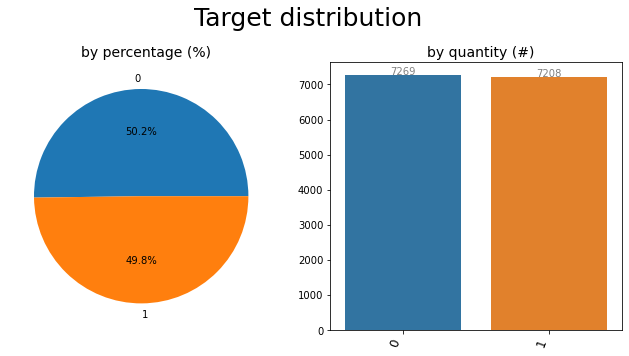

In [105]:
barplot_and_pie(df_clients_to_predict_backend_sort["TARGET"], "Target distribution", " ")

In [107]:
df_clients_to_predict_backend_sort.drop(columns="TARGET", axis=1, inplace=True)

In [108]:
df_clients_to_predict_backend_sort.shape

(14477, 151)

In [110]:
df_clients_to_predict_backend_sort.to_csv("datasets/backend/df_clients_to_predict_feature_selected.csv", index=False)

In [ ]:
df_clients

In [ ]:
df_clients_to_predict_feature_selected11.csv

In [13]:
df_XX = pd.read_csv(r"datasets\backend\df_clients_to_predict_feature_selected11.csv")

In [5]:
df_XX.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,100005,0,0,222768.0,180000.0,0.035792,-18064,-4469.0,-9118.0,-1623,...,11.0,11.0,213.0,0.0000,0.0,4813.20,6240.205,56161.844,-609.55554,-5486.0
1,100038,0,1,625500.0,625500.0,0.010032,-13040,-2191.0,-4000.0,-4262,...,13.0,13.0,147.0,0.0000,0.0,11097.45,11100.338,133204.050,-634.25000,-7611.0
2,100057,0,1,499221.0,373500.0,0.022800,-16685,-2580.0,-10125.0,-241,...,13.0,13.0,220.0,0.0000,0.0,4747.59,9845.424,98454.240,-553.40000,-5534.0
3,100090,1,0,261621.0,216000.0,0.008019,-15524,-3555.0,-7833.0,-3985,...,58.0,58.0,361.0,-5806.4517,-360000.0,5837.40,20018.154,1241125.500,-532.79034,-33033.0
4,100091,1,0,296280.0,225000.0,0.018634,-12278,-929.0,-6031.0,-4586,...,6.0,6.0,61.0,0.0000,0.0,7078.95,8445.258,42226.290,-540.20000,-2701.0


In [14]:
clients_id = df_XX["SK_ID_CURR"].tolist()

In [18]:
if "1" not in clients_id:
    print("not found")

not found


In [21]:
df_XX

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,100005,0,0,222768.0,180000.0,0.035792,-18064,-4469.000,-9118.0,-1623,...,11.0,11.0,213.0,0.0000,0.000,4813.200,6240.2050,56161.844,-609.55554,-5486.0
1,100038,0,1,625500.0,625500.0,0.010032,-13040,-2191.000,-4000.0,-4262,...,13.0,13.0,147.0,0.0000,0.000,11097.450,11100.3380,133204.050,-634.25000,-7611.0
2,100057,0,1,499221.0,373500.0,0.022800,-16685,-2580.000,-10125.0,-241,...,13.0,13.0,220.0,0.0000,0.000,4747.590,9845.4240,98454.240,-553.40000,-5534.0
3,100090,1,0,261621.0,216000.0,0.008019,-15524,-3555.000,-7833.0,-3985,...,58.0,58.0,361.0,-5806.4517,-360000.000,5837.400,20018.1540,1241125.500,-532.79034,-33033.0
4,100091,1,0,296280.0,225000.0,0.018634,-12278,-929.000,-6031.0,-4586,...,6.0,6.0,61.0,0.0000,0.000,7078.950,8445.2580,42226.290,-540.20000,-2701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14472,456168,1,0,835686.0,765000.0,0.025164,-11387,-846.000,-9379.0,-2530,...,8.0,8.0,89.0,0.0000,0.000,14880.060,24386.8890,170708.220,-546.71430,-3827.0
14473,456170,1,1,500490.0,450000.0,0.006671,-21780,-2396.676,-10745.0,-5249,...,7.0,7.0,56.0,0.0000,0.000,8451.585,8452.8220,50716.934,-514.33330,-3086.0
14474,456189,1,0,360000.0,360000.0,0.026392,-19397,-119.000,-4386.0,-2945,...,26.0,26.0,521.0,223.5888,16769.160,21.870,5727.6460,429573.470,-580.18665,-43514.0
14475,456222,1,0,622413.0,495000.0,0.035792,-11186,-1149.000,-3015.0,-3003,...,74.0,74.0,438.0,314.7146,22974.164,2.700,7771.4478,567315.700,-992.71234,-72468.0


In [22]:
df_XX["AMT_INCOME"]

KeyError: 'AMT_INCOME'

In [4]:
# load the model from disk
initial_model = joblib.load("models/model_20220220.pkl")

In [7]:
y_prob = initial_model.predict_proba(df_XX.drop(columns="SK_ID_CURR", axis=1))
y_prob_temp = y_prob[:, 1]

In [23]:
yhat = (y_prob_temp >= threshold).astype(int)

In [24]:
Counter(yhat)

Counter({1: 1})

In [10]:
y_prob[0][1]

0.1596669256807349

In [11]:
y_prob[:, 1]

array([0.15966693, 0.14578794, 0.01248623, ..., 0.13982981, 0.05761376,
       0.21871219])

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">REDUCIENDO CLIENTES ACTUALES</h2>
</div>

In [6]:
df_current_clients_reduced = pd.read_csv(r"datasets\backend\df_current_clients_reduced.csv")

In [7]:
df_current_clients_feature_selected = pd.read_csv(r"datasets\backend\df_current_clients_feature_selected.csv")

In [8]:
df_analysis(df_current_clients_reduced, "df_current_clients_reduced", analysis_type="header")


Analysis Header of df_current_clients_reduced dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 10 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 23.5 MB


In [10]:
df_current_clients_reduced.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'DAYS_BIRTH', 'DAYS_EMPLOYED'],
      dtype='object')

In [9]:
df_analysis(df_current_clients_feature_selected, "df_current_clients_feature_selected", analysis_type="header")


Analysis Header of df_current_clients_feature_selected dataset
--------------------------------------------------------------------------------
- Dataset shape:			 307507 rows and 150 columns
- Total of NaN values:			 0
- Percentage of NaN:			 0.0 %
- Total of infinite values:		 0
- Percentage of infinite values:	 0.0 %
- Total of full duplicates rows:	 0
- Total of empty rows:			 0
- Total of empty columns:		 0
- Unique indexes:			 True
- Memory usage:				 351.9 MB


In [23]:
df_XX = pd.read_csv(r"datasets\backend\df_clients_to_predict_feature_selected11.csv")

In [24]:
df_XX.shape

(14477, 151)

In [25]:
df_old = pd.read_csv(r"datasets\finals_datasets\df_clients_to_predict.csv")

In [26]:
df_old.shape

(48744, 508)

In [31]:
df_new = df_old[df_old['SK_ID_CURR'].isin(df_XX['SK_ID_CURR'])]

In [34]:
df_new.shape

(14477, 508)

In [37]:
df_new = df_new.sort_values(by=['SK_ID_CURR']).reset_index(drop=True)

In [42]:
df_new.tail()

,index,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
14472,48734,456168,1,0,0,0,135000.0,835686.0,46660.5,765000.0,...,24386.889,170708.220,14880.060,81427.860,24386.8890,170708.220,-470.0,-546.71430,-3827.0,7.0
14473,48736,456170,1,1,0,0,157500.0,500490.0,48888.0,450000.0,...,8452.822,50716.934,8451.585,8453.070,8452.8220,50716.934,-441.0,-514.33330,-3086.0,6.0
14474,48737,456189,1,0,0,0,270000.0,360000.0,28570.5,360000.0,...,5951.235,446342.620,21.870,59231.430,5727.6460,429573.470,-24.0,-580.18665,-43514.0,75.0
14475,48740,456222,1,0,1,2,157500.0,622413.0,31909.5,495000.0,...,8086.162,590289.800,2.700,14571.765,7771.4478,567315.700,-56.0,-992.71234,-72468.0,73.0
14476,48743,456250,1,1,1,0,135000.0,312768.0,24709.5,270000.0,...,13238.063,661903.100,1.080,26474.625,13044.9830,652249.200,-33.0,-365.76000,-18288.0,50.0


In [40]:
df_XX = df_XX.sort_values(by=['SK_ID_CURR']).reset_index(drop=True)

In [44]:
df_XX.tail()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
14472,456168,1,0,835686.0,765000.0,0.025164,-11387,-846.000,-9379.0,-2530,...,8.0,8.0,89.0,0.0000,0.000,14880.060,24386.8890,170708.220,-546.71430,-3827.0
14473,456170,1,1,500490.0,450000.0,0.006671,-21780,-2396.676,-10745.0,-5249,...,7.0,7.0,56.0,0.0000,0.000,8451.585,8452.8220,50716.934,-514.33330,-3086.0
14474,456189,1,0,360000.0,360000.0,0.026392,-19397,-119.000,-4386.0,-2945,...,26.0,26.0,521.0,223.5888,16769.160,21.870,5727.6460,429573.470,-580.18665,-43514.0
14475,456222,1,0,622413.0,495000.0,0.035792,-11186,-1149.000,-3015.0,-3003,...,74.0,74.0,438.0,314.7146,22974.164,2.700,7771.4478,567315.700,-992.71234,-72468.0
14476,456250,1,1,312768.0,270000.0,0.006629,-13962,-633.000,-1072.0,-4220,...,30.0,30.0,430.0,193.0797,9653.985,1.080,13044.9830,652249.200,-365.76000,-18288.0


In [ ]:
, inplace=True

In [55]:
df_XX.insert(loc=1, column="AMT_INCOME_TOTAL", value=df_new["AMT_INCOME_TOTAL"])

df_XX.drop("AMT_INCOME_TOTAL", axis=1, inplace=True)

In [56]:
df_XX

,SK_ID_CURR,AMT_INCOME_TOTAL,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,POS_MONTHS_BALANCE_SIZE,POS_COUNT,INSTAL_DBD_SUM,INSTAL_PAYMENT_DIFF_MEAN,INSTAL_PAYMENT_DIFF_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM
0,100005,99000.0,0,0,222768.0,180000.0,0.035792,-18064,-4469.000,-9118.0,...,11.0,11.0,213.0,0.0000,0.000,4813.200,6240.2050,56161.844,-609.55554,-5486.0
1,100038,180000.0,0,1,625500.0,625500.0,0.010032,-13040,-2191.000,-4000.0,...,13.0,13.0,147.0,0.0000,0.000,11097.450,11100.3380,133204.050,-634.25000,-7611.0
2,100057,180000.0,0,1,499221.0,373500.0,0.022800,-16685,-2580.000,-10125.0,...,13.0,13.0,220.0,0.0000,0.000,4747.590,9845.4240,98454.240,-553.40000,-5534.0
3,100090,135000.0,1,0,261621.0,216000.0,0.008019,-15524,-3555.000,-7833.0,...,58.0,58.0,361.0,-5806.4517,-360000.000,5837.400,20018.1540,1241125.500,-532.79034,-33033.0
4,100091,247500.0,1,0,296280.0,225000.0,0.018634,-12278,-929.000,-6031.0,...,6.0,6.0,61.0,0.0000,0.000,7078.950,8445.2580,42226.290,-540.20000,-2701.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14472,456168,135000.0,1,0,835686.0,765000.0,0.025164,-11387,-846.000,-9379.0,...,8.0,8.0,89.0,0.0000,0.000,14880.060,24386.8890,170708.220,-546.71430,-3827.0
14473,456170,157500.0,1,1,500490.0,450000.0,0.006671,-21780,-2396.676,-10745.0,...,7.0,7.0,56.0,0.0000,0.000,8451.585,8452.8220,50716.934,-514.33330,-3086.0
14474,456189,270000.0,1,0,360000.0,360000.0,0.026392,-19397,-119.000,-4386.0,...,26.0,26.0,521.0,223.5888,16769.160,21.870,5727.6460,429573.470,-580.18665,-43514.0
14475,456222,157500.0,1,0,622413.0,495000.0,0.035792,-11186,-1149.000,-3015.0,...,74.0,74.0,438.0,314.7146,22974.164,2.700,7771.4478,567315.700,-992.71234,-72468.0


In [57]:
df_XX.to_csv("datasets/backend/df_clients_to_predict_20220221.csv", index=False)

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">REDUCIENDO CLIENTES ACTUALES</h2>
</div>

In [2]:
df_actual = pd.read_csv(r"datasets\df_current_clients_reduced_actual.csv")

In [3]:
df_old = pd.read_csv(r"datasets\df_current_clients_feature_selected_old.csv")

In [4]:
df_actual.shape

(307507, 10)

In [5]:
df_old.shape

(307507, 150)

In [6]:
df_actual.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED
0,100002,1.0,0,0,0,0,202500.0,406597.5,-9461,-637.0
1,100003,0.0,1,0,1,0,270000.0,1293502.5,-16765,-1188.0
2,100004,0.0,0,1,0,0,67500.0,135000.0,-19046,-225.0
3,100006,0.0,1,0,0,0,135000.0,312682.5,-19005,-3039.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,-19932,-3038.0


In [7]:
df_actual.insert(loc=9, column="EXT_SOURCE_2", value=df_old["EXT_SOURCE_2"])

In [8]:
df_actual.shape

(307507, 11)

In [9]:
df_actual.insert(loc=9, column="EXT_SOURCE_3", value=df_old["EXT_SOURCE_3"])

In [10]:
df_actual.shape

(307507, 12)

In [11]:
df_actual.to_csv("datasets/backend/df_current_clients_20220221.csv", index=False)

In [12]:
df_actual["EXT_SOURCE_3"]

0         0.139376
1         0.509353
2         0.729567
3         0.509353
4         0.509353
            ...   
307502    0.509353
307503    0.509353
307504    0.218859
307505    0.661024
307506    0.113922
Name: EXT_SOURCE_3, Length: 307507, dtype: float64

In [14]:
df_actual["EXT_SOURCE_3"] = df_actual['EXT_SOURCE_3'].round(3)

In [15]:
df_actual["EXT_SOURCE_3"]

0         0.139
1         0.509
2         0.730
3         0.509
4         0.509
          ...  
307502    0.509
307503    0.509
307504    0.219
307505    0.661
307506    0.114
Name: EXT_SOURCE_3, Length: 307507, dtype: float64